In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
dataset=pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1].values
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)
x=x.reshape(len(x),1)

In [35]:
sc_Y=StandardScaler()
sc_X=StandardScaler()
y_scaled=sc_Y.fit_transform(y)
x_scaled=sc_X.fit_transform(x)

In [36]:
print(y_scaled)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Support vector machine model
## $$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$$

In [46]:
Svrm=SVR(kernel='rbf')
Svrm.fit(x_scaled,y_scaled)
Reversed=Svrm.predict(sc_X.transform( [[6.5]]))
round(sc_Y.inverse_transform(Reversed)[0],2)

C:\Users\Re\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


170370.02

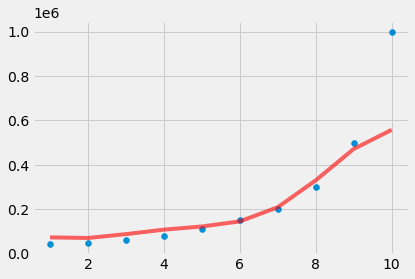

In [51]:
plt.style.use("fivethirtyeight")
plt.scatter(x,y)
plt.plot(x,sc_Y.inverse_transform(Svrm.predict(x_scaled)),c="red",alpha=0.6)

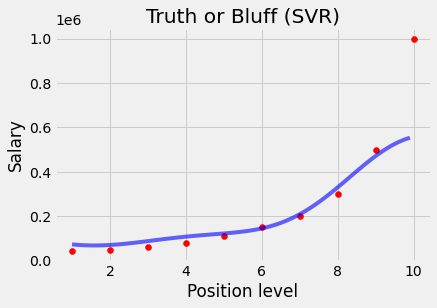

In [57]:
X_grid = np.arange(min(sc_X.inverse_transform(x_scaled)), max(sc_X.inverse_transform(x_scaled)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(x_scaled), sc_Y.inverse_transform(y_scaled), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(Svrm.predict(sc_X.transform(X_grid))), color = 'blue',alpha=0.6)
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()